In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as k
from  tensorflow.keras import layers

In [2]:
x = tf.random.normal([2,5,5,3])
w = tf.random.normal([3,3,3,4])

In [3]:
out = tf.nn.conv2d(x,w,strides=1,padding=[[0,0],[0,0],[0,0],[0,0]])
out.shape

TensorShape([2, 3, 3, 4])

In [4]:
out = tf.nn.conv2d(x,w,strides=1,padding=[[0,0],[1,1],[1,1],[0,0]])
out.shape

TensorShape([2, 5, 5, 4])

In [5]:
out = tf.nn.conv2d(x,w,strides=1,padding="SAME")
out.shape

TensorShape([2, 5, 5, 4])

In [12]:
out = tf.nn.conv2d(x,w,strides=3,padding="SAME")
out.shape

TensorShape([2, 2, 2, 4])

In [13]:
b = tf.zeros([4])
print(out)
out = out + 4
print(out)

tf.Tensor(
[[[[  1.2617452    0.7868017   10.631308    -3.9056907 ]
   [ -1.0621094   -2.7451036    8.592527    -1.7331948 ]]

  [[ -9.068312    -1.244396    -7.1816626    3.9098196 ]
   [  2.4038322   -2.877333     4.322848    -2.8400054 ]]]


 [[[ -3.951347     4.201068   -10.864672     6.5969157 ]
   [  1.5218661    1.3711784    0.01788038  -2.3165197 ]]

  [[  1.2186751   -0.75807244   3.5617695   -0.37776738]
   [ -1.8935605    0.13254738  -1.5031054   -0.47168088]]]], shape=(2, 2, 2, 4), dtype=float32)
tf.Tensor(
[[[[ 5.2617455   4.786802   14.631308    0.09430933]
   [ 2.9378905   1.2548964  12.592527    2.2668052 ]]

  [[-5.0683117   2.755604   -3.1816626   7.9098196 ]
   [ 6.4038324   1.1226671   8.322847    1.1599946 ]]]


 [[[ 0.04865289  8.201068   -6.8646717  10.596916  ]
   [ 5.521866    5.3711786   4.0178804   1.6834803 ]]

  [[ 5.218675    3.2419276   7.5617695   3.6222327 ]
   [ 2.1064396   4.1325474   2.4968946   3.5283191 ]]]], shape=(2, 2, 2, 4), dtype=float32)


In [22]:
layer = layers.Conv2D(4, kernel_size=3, strides=1, padding="SAME")
out = layer(x)
out.shape

TensorShape([2, 5, 5, 4])

In [23]:
layer.trainable_variables

[<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 3, 4) dtype=float32, numpy=
 array([[[[-0.13312691,  0.11174396, -0.30182788, -0.12716603],
          [-0.17392473,  0.11252919, -0.22878462,  0.15242964],
          [ 0.09085491, -0.17088701, -0.2628021 , -0.0999193 ]],
 
         [[-0.10237268,  0.17628217, -0.10458486,  0.2774857 ],
          [-0.19978416,  0.15922135,  0.16151029,  0.01040673],
          [-0.16308425,  0.30388817,  0.07588512, -0.05970423]],
 
         [[ 0.09681013, -0.17073984,  0.22532544, -0.30045557],
          [ 0.13383731,  0.13836852,  0.07300881,  0.23909107],
          [ 0.28176495, -0.16693677,  0.18085736,  0.205376  ]]],
 
 
        [[[ 0.02772132,  0.05495715,  0.10449648, -0.06421924],
          [ 0.25039312, -0.12093747,  0.10061195,  0.3074942 ],
          [ 0.28521952,  0.3066444 , -0.12745821, -0.21059535]],
 
         [[ 0.2644079 , -0.14695972, -0.26158476, -0.28864357],
          [-0.2680601 ,  0.09786016,  0.22459552,  0.30586144],
          [-0.

In [26]:
layer.kernel,layer.bias

(<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 3, 4) dtype=float32, numpy=
 array([[[[-0.13312691,  0.11174396, -0.30182788, -0.12716603],
          [-0.17392473,  0.11252919, -0.22878462,  0.15242964],
          [ 0.09085491, -0.17088701, -0.2628021 , -0.0999193 ]],
 
         [[-0.10237268,  0.17628217, -0.10458486,  0.2774857 ],
          [-0.19978416,  0.15922135,  0.16151029,  0.01040673],
          [-0.16308425,  0.30388817,  0.07588512, -0.05970423]],
 
         [[ 0.09681013, -0.17073984,  0.22532544, -0.30045557],
          [ 0.13383731,  0.13836852,  0.07300881,  0.23909107],
          [ 0.28176495, -0.16693677,  0.18085736,  0.205376  ]]],
 
 
        [[[ 0.02772132,  0.05495715,  0.10449648, -0.06421924],
          [ 0.25039312, -0.12093747,  0.10061195,  0.3074942 ],
          [ 0.28521952,  0.3066444 , -0.12745821, -0.21059535]],
 
         [[ 0.2644079 , -0.14695972, -0.26158476, -0.28864357],
          [-0.2680601 ,  0.09786016,  0.22459552,  0.30586144],
          [-0.

In [2]:
# LeNEt-5
from tensorflow.keras import Sequential

network = Sequential([
    layers.Conv2D(6,kernel_size=3, strides=1),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.ReLU(),
    layers.Conv2D(16,kernel_size=3, strides=1),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.ReLU(),
    layers.Flatten(),
    
    layers.Dense(120, activation = 'relu'),
    layers.Dense(84, activation = 'relu'),
    layers.Dense(10)
])

network.build(input_shape=(4, 28, 28, 1))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (4, 26, 26, 6)            60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (4, 13, 13, 6)            0         
_________________________________________________________________
re_lu (ReLU)                 (4, 13, 13, 6)            0         
_________________________________________________________________
conv2d_1 (Conv2D)            (4, 11, 11, 16)           880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (4, 5, 5, 16)             0         
_________________________________________________________________
re_lu_1 (ReLU)               (4, 5, 5, 16)             0         
_________________________________________________________________
flatten (Flatten)            (4, 400)                  0

In [3]:
from tensorflow.keras import datasets, layers, optimizers
from tensorflow.keras import losses

criteon = losses.CategoricalCrossentropy(from_logits=True)
optimizer = optimizers.Adam()
(x, y), (x_test, y_test) = datasets.mnist.load_data()

print('x:', x.shape, 'y:', y.shape, 'x test:', x_test.shape, 'y test:', y_test)

def preprocess(x, y):
    # [0~1]
    x = 2*tf.cast(x, dtype=tf.float32) / 255.-1
    y = tf.cast(y, dtype=tf.int32)
    return x,y

# 构建训练集对象
train_db = tf.data.Dataset.from_tensor_slices((x,y))
train_db = train_db.shuffle(1000).batch(128)
# 构建测试集对象
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_db = test_db.map(preprocess).batch(128)

for i in range(3):
    with tf.GradientTape() as tape:
        x = tf.expand_dims(x, axis=3)
        out = network(x)
        y_onehot = tf.one_hot(y, depth=10)
        loss = criteon(y_onehot, out)

    grads = tape.gradient(loss, network.trainable_variables)
    optimizer.apply_gradients(zip(grads, network.trainable_variables))

    correct, total = 0,0

    for x,y in train_db:
        x = tf.expand_dims(x,axis=3)
        out = network(x)
        pred = tf.argmax(out, axis=-1)
        y = tf.cast(y, tf.int64)
        correct += float(tf.reduce_sum(tf.cast(tf.equal(pred,y),tf.float32)))
        total += x.shape[0]

    print('train_acc:', correct/total)

x: (60000, 28, 28) y: (60000,) x test: (10000, 28, 28) y test: [7 2 1 ... 4 5 6]
train_acc: 0.21333333333333335
train_acc: 0.21766666666666667
train_acc: 0.22015


In [16]:
correct, total = 0,0

for x,y in test_db:
    x = tf.expand_dims(x,axis=3)
    out = network(x)
    pred = tf.argmax(out, axis=-1)
    y = tf.cast(y, tf.int64)
    correct += float(tf.reduce_sum(tf.cast(tf.equal(pred,y),tf.float32)))
    total += x.shape[0]

print('test_acc:', correct/total)

test_acc: 0.1496


In [2]:
x = tf.random.normal([100, 32, 32, 3])
x = tf.reshape(x, [-1, 3])

In [4]:
x.shape

TensorShape([102400, 3])

In [5]:
ub = tf.reduce_mean(x, axis = 0)

In [6]:
ub

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.00021444, -0.00204687, -0.00099128], dtype=float32)>

In [25]:
from tensorflow.keras import datasets, layers, optimizers
from tensorflow.keras import losses
from tensorflow.keras import Sequential

(x, y), (x_test, y_test) = datasets.mnist.load_data()
layer = layers.BatchNormalization()

network = Sequential([
    layers.Conv2D(6, kernel_size=3, strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2,strides=2),
    layers.ReLU(),
    layers.Conv2D(16, kernel_size=3, strides=1),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=2, strides=2),
    layers.ReLU(),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10)
])

network.build(input_shape=(4, 28, 28, 1))

with tf.GradientTape() as tape:
    x = tf.expand_dims(x, axis=3)
    out = network(x, training = True)
    
for x,y in test_db:
    x = tf.expand_dims(x,axis=3)
    out = network(x, training=False)
#     break

5


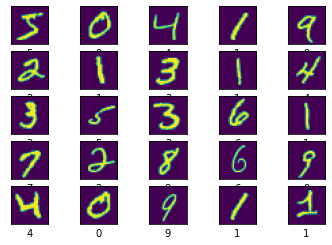

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print(train_labels[0])
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(str(train_labels[i]))
plt.show()

28 28 1
Model: "AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 96)        11712     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 96)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 256)         614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 2, 2, 384)         1327488   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 256)     

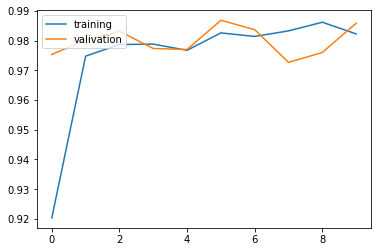

313/313 [==============================] - 5s 15ms/step - loss: 0.0788 - accuracy: 0.9869
[0.07877398282289505, 0.9868999719619751]
please enter your command!(0:quite, 1>:continue!)0


In [4]:
# Alex
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

def AlexNet_inference(in_shape):
    model = keras.Sequential(name='AlexNet')  
    # model.add(layers.Conv2D(96,(11,11),strides=(4,4),input_shape=(in_shape[1],in_shape[2],in_shape[3]),
                # padding='same',activation='relu',kernel_initializer='uniform')) 
                
    model.add(layers.Conv2D(96,(11,11),strides=(2,2),input_shape=(in_shape[1],in_shape[2],in_shape[3]),
                padding='same',activation='relu',kernel_initializer='uniform'))  
    model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
    model.add(layers.Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
    model.add(layers.MaxPooling2D(pool_size=(3,3),strides=(2,2)))  
    model.add(layers.Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
    model.add(layers.Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
    model.add(layers.Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))  
    model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))  
    model.add(layers.Flatten())  
    model.add(layers.Dense(2048,activation='relu'))  
    model.add(layers.Dropout(0.5))  
    model.add(layers.Dense(2048,activation='relu'))  
    model.add(layers.Dropout(0.5))  
    model.add(layers.Dense(10,activation='softmax'))  
    model.compile(optimizer=keras.optimizers.Adam(),
                loss='sparse_categorical_crossentropy', #不能直接用函数，否则在与测试加载模型不成功！
                metrics=['accuracy'])
    model.summary()  
    return model


mnist = tf.keras.datasets.mnist
MODEL_DIR = "models/"

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# train_images, test_images = train_images / 255.0, test_images / 255.0

x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
print(x_train.shape[1], x_train.shape[2], x_train.shape[3])
x_shape  = x_train.shape
 
AlexNet_model = AlexNet_inference(x_shape)
totall_epochs = 0
epochs = 10

while(True):
    history = AlexNet_model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_split=0.1)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['training', 'valivation'], loc='upper left')
    plt.show()

    res = AlexNet_model.evaluate(x_test, y_test)
    print(res)
    
    totall_epochs += epochs
    model_save_dir = MODEL_DIR+'AlexNet_model_'+str(totall_epochs)+'.h5'
    AlexNet_model.save( model_save_dir )

    keyVal = input('please enter your command!(0:quite, 1>:continue!)')
    keyVal = int(keyVal)
    if 0==keyVal:
        break
    elif 0<=keyVal and 10>=keyVal:
        epochs = keyVal

